# HOUSE PRICE PREDICTION PROJECT

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Let's consider Train dataset

In [2]:
df = pd.read_csv('housing_train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [3]:
df.shape

(1168, 81)

In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Columns Description

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
CentralAir: Central air conditioning

       N	No
       Y	Yes
		
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

In [5]:
# checking any duplicate values
df.duplicated().sum()

0

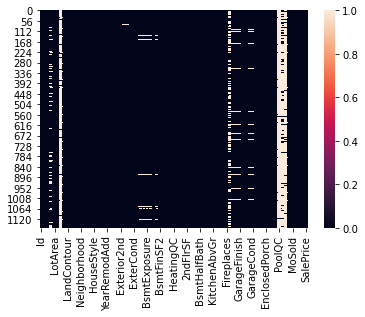

In [6]:
sns.heatmap(df.isnull())
plt.show()

    Dataset contains null values

In [7]:
print(df.isnull().sum()[:60])
df.isnull().sum()[60:81]

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
Street             0
Alley           1091
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         7
MasVnrArea         7
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          30
BsmtCond          30
BsmtExposure      31
BsmtFinType1      30
BsmtFinSF1         0
BsmtFinType2      31
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

GarageFinish       64
GarageCars          0
GarageArea          0
GarageQual         64
GarageCond         64
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1161
Fence             931
MiscFeature      1124
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
dtype: int64

In [8]:
# columns with high numbers of missing values
print(df['Alley'].isnull().sum())
print(df['FireplaceQu'].isnull().sum())
print(df['PoolQC'].isnull().sum())
print(df['Fence'].isnull().sum())
print(df['MiscFeature'].isnull().sum())

1091
551
1161
931
1124


In [9]:
# percentage of missing values
print('Alley:',((1168-(1168-1091))/1168)*100)
print('FireplaceQu:',((1168-(1168-551))/1168)*100)
print('PoolQC:',((1168-(1168-1161))/1168)*100)
print('Fence:',((1168-(1168-931))/1168)*100)
print('MiscFeature:',((1168-(1168-1124))/1168)*100)

Alley: 93.40753424657534
FireplaceQu: 47.17465753424658
PoolQC: 99.40068493150685
Fence: 79.70890410958904
MiscFeature: 96.23287671232876


### Observations
    Since percentage of missing values in these columns are high, we can drop these columns.
    Id column is of no use, hence we can drop this column also.

In [10]:
# dropping columns
df.drop(['Id','Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [11]:
df.shape

(1168, 75)

In [12]:
# separating features into continuous features and discrete features
con_fea = []
dis_fea = []

for i in df.columns:
    # continuous features
    if df[i].dtype != "O":
        con_fea.append(i)
    # discrete features
    else:
        dis_fea.append(i)

In [13]:
# continuous features
cf = pd.DataFrame({})
for i in con_fea:
    cf[i]=df[i]

# discrete features
dif = pd.DataFrame({})
for i in dis_fea:
    dif[i]=df[i]

In [14]:
# continuous features
cf.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,120,NaN,4928,6,5,1976,1976,0.0,120,0,...,0,205,0,0,0,0,0,2,2007,128000
1,20,95.0,15865,8,6,1970,1970,0.0,351,823,...,81,207,0,0,224,0,0,10,2007,268000
2,60,92.0,9920,7,5,1996,1997,0.0,862,0,...,180,130,0,0,0,0,0,6,2007,269790
3,20,105.0,11751,6,6,1977,1977,480.0,705,0,...,0,122,0,0,0,0,0,1,2010,190000
4,20,NaN,16635,6,7,1977,2000,126.0,1246,0,...,240,0,0,0,0,0,0,6,2009,215000


In [15]:
# discrete features
dif.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,COD,Normal
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Fin,TA,TA,Y,WD,Normal


# Handling the NaN values

## 1. Method: KNNImputer

In [16]:
from sklearn.impute import KNNImputer

# filling the NaN values present in the continuous features
imputer = KNNImputer(n_neighbors=5)
cf = pd.DataFrame(imputer.fit_transform(cf),columns = cf.columns)

In [17]:
cf.isnull().sum().any()

False

## 2. Method: SimpleImputer

In [18]:
from sklearn.impute import SimpleImputer

# filling the NaN values present in the discrete features
imputer2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
dif = pd.DataFrame(imputer2.fit_transform(dif),columns = dif.columns)

In [19]:
dif.isnull().sum().any()

False

In [20]:
df = pd.concat([cf,dif],axis=1)
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,120.0,57.4,4928.0,6.0,5.0,1976.0,1976.0,0.0,120.0,0.0,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,20.0,95.0,15865.0,8.0,6.0,1970.0,1970.0,0.0,351.0,823.0,...,SBrkr,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
2,60.0,92.0,9920.0,7.0,5.0,1996.0,1997.0,0.0,862.0,0.0,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
3,20.0,105.0,11751.0,6.0,6.0,1977.0,1977.0,480.0,705.0,0.0,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,COD,Normal
4,20.0,62.8,16635.0,6.0,7.0,1977.0,2000.0,126.0,1246.0,0.0,...,SBrkr,Gd,Typ,Attchd,Fin,TA,TA,Y,WD,Normal


In [21]:
df.isnull().sum().any()

False

# Feature Engineering

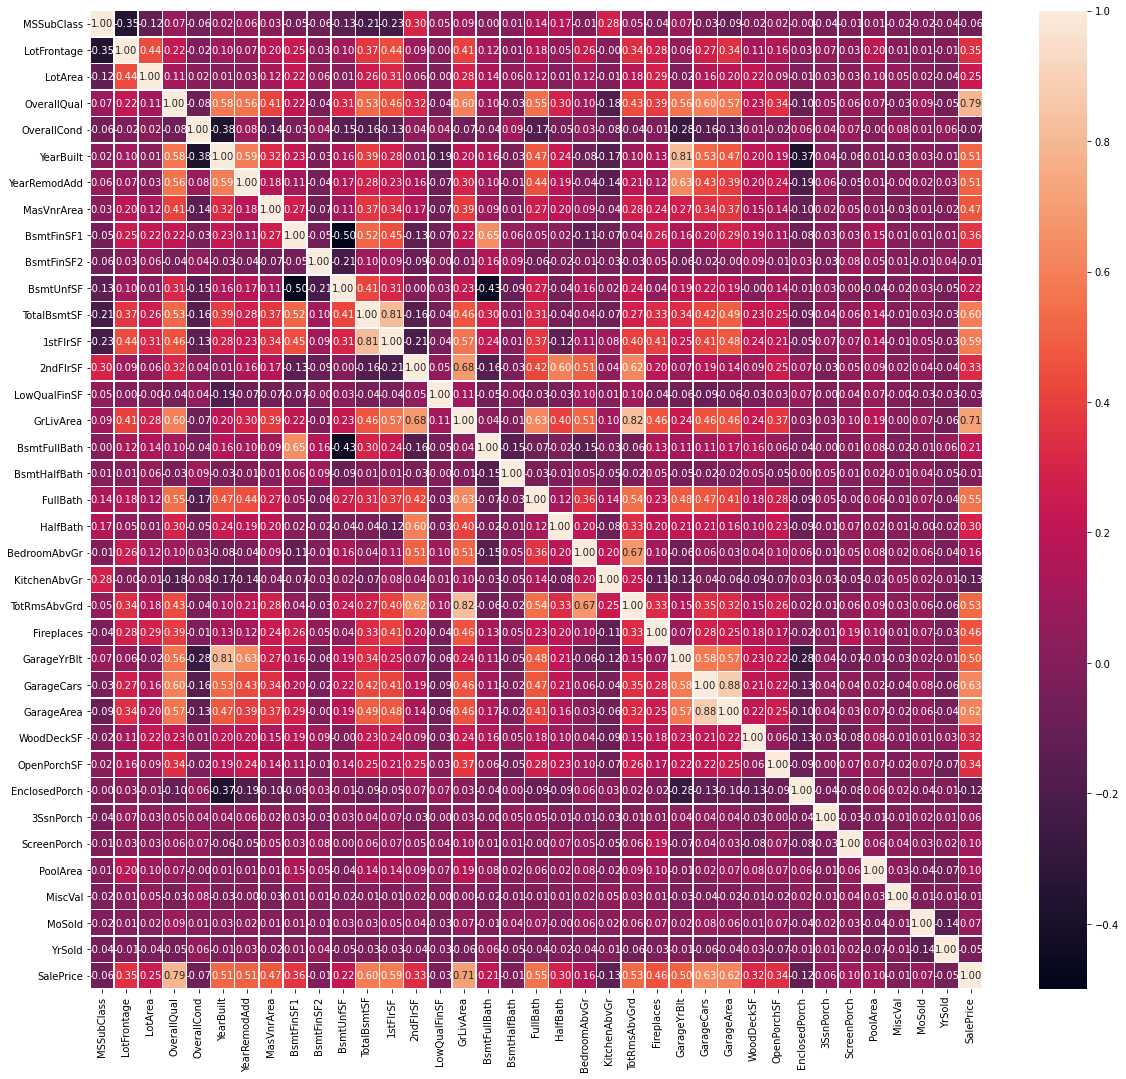

In [22]:
# correlation matrix
plt.figure(figsize=(20,18))
sns.heatmap(cf.corr(),annot=True,fmt='.2f',linewidths=.5)
plt.show()

In [23]:
cf.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.789185
GrLivArea        0.707300
GarageCars       0.628329
GarageArea       0.619000
TotalBsmtSF      0.595042
1stFlrSF         0.587642
FullBath         0.554988
TotRmsAbvGrd     0.528363
YearBuilt        0.514408
YearRemodAdd     0.507831
GarageYrBlt      0.500487
MasVnrArea       0.468756
Fireplaces       0.459611
BsmtFinSF1       0.362874
LotFrontage      0.349874
OpenPorchSF      0.339500
2ndFlrSF         0.330386
WoodDeckSF       0.315444
HalfBath         0.295592
LotArea          0.249499
BsmtUnfSF        0.215724
BsmtFullBath     0.212924
BedroomAbvGr     0.158281
PoolArea         0.103280
ScreenPorch      0.100284
MoSold           0.072764
3SsnPorch        0.060119
BsmtFinSF2      -0.010151
BsmtHalfBath    -0.011109
MiscVal         -0.013071
LowQualFinSF    -0.032381
YrSold          -0.045508
MSSubClass      -0.060775
OverallCond     -0.065642
EnclosedPorch   -0.115004
KitchenAbvGr    -0.132108
Name: SalePrice, dtype: float64

### Observations:

    BedroomAbvGr     0.158281
    PoolArea         0.103280
    ScreenPorch      0.100284
    MoSold           0.072764
    3SsnPorch        0.060119
    BsmtFinSF2      -0.010151
    BsmtHalfBath    -0.011109
    MiscVal         -0.013071
    LowQualFinSF    -0.032381
    YrSold          -0.045508
    MSSubClass      -0.060775
    OverallCond     -0.065642
    EnclosedPorch   -0.115004
    KitchenAbvGr    -0.132108
    
    - These are the features which have 'weak correleation' with target variable, hence we can drop these features.

In [24]:
# unwanted features
uf = 'BedroomAbvGr,PoolArea,ScreenPorch,MoSold,3SsnPorch,BsmtFinSF2,BsmtHalfBath,MiscVal,LowQualFinSF,YrSold,MSSubClass,OverallCond,EnclosedPorch,KitchenAbvGr' 
uf = uf.split(',')
uf

['BedroomAbvGr',
 'PoolArea',
 'ScreenPorch',
 'MoSold',
 '3SsnPorch',
 'BsmtFinSF2',
 'BsmtHalfBath',
 'MiscVal',
 'LowQualFinSF',
 'YrSold',
 'MSSubClass',
 'OverallCond',
 'EnclosedPorch',
 'KitchenAbvGr']

In [25]:
# dropping features
cf.drop(uf,axis=1,inplace=True)

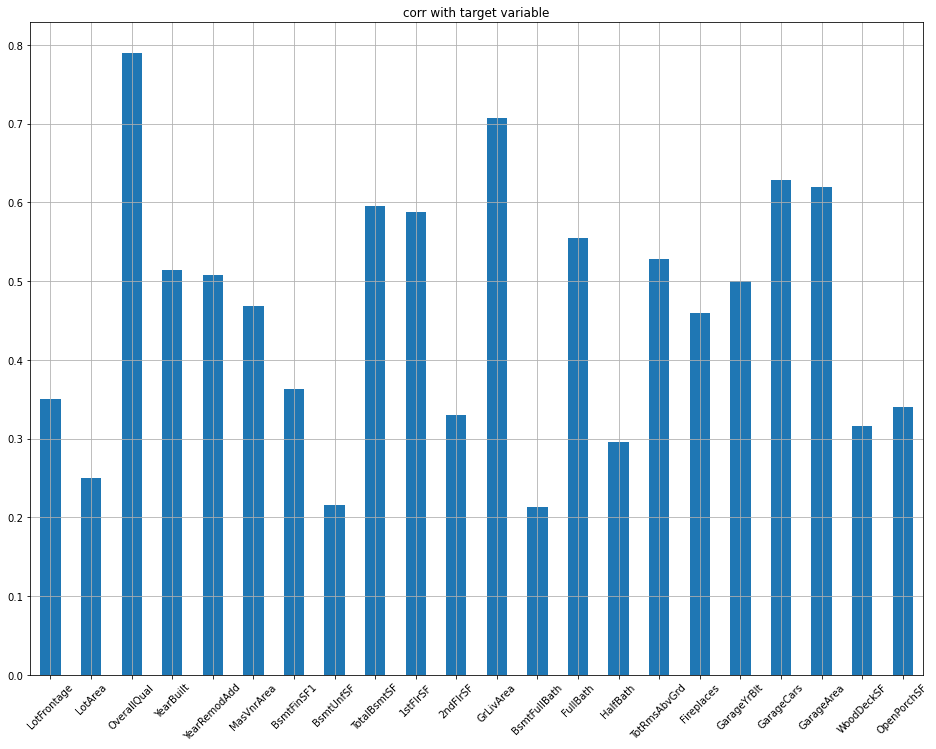

In [26]:
plt.figure(figsize=(16,12))
cf.drop('SalePrice',axis=1).corrwith(cf['SalePrice']).plot(kind='bar',grid=True)
plt.xticks(rotation=45)
plt.title('corr with target variable')
plt.show()

### Observations:

    OverallQual     0.789185
    GrLivArea       0.707300
    GarageCars      0.628329
    GarageArea      0.619000
    TotalBsmtSF     0.595042
    1stFlrSF        0.587642
    FullBath        0.554988
    TotRmsAbvGrd    0.528363
    YearBuilt       0.514408
    YearRemodAdd    0.507831
    GarageYrBlt     0.500487
    
    - These are the features which have 'strong correlation' with target variable.
    - These features are affecting the price 'positively'.

In [27]:
# converting categorical values into discrete values
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
for i in dif.columns:
    dif[i]=le.fit_transform(dif[i])

In [28]:
dif.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,1,0,3,0,4,0,13,2,2,...,4,3,6,1,1,4,4,2,8,4
1,3,1,0,3,0,4,1,12,2,2,...,4,2,6,1,2,4,4,2,8,4
2,3,1,0,3,0,1,0,15,2,2,...,4,3,6,1,2,4,4,2,8,4
3,3,1,0,3,0,4,0,14,2,2,...,4,3,6,1,1,4,4,2,0,4
4,3,1,0,3,0,2,0,14,2,2,...,4,2,6,1,0,4,4,2,8,4


In [29]:
hd = pd.concat([cf,dif],axis=1)
hd.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,57.4,4928.0,6.0,1976.0,1976.0,0.0,120.0,958.0,1078.0,958.0,...,4,3,6,1,1,4,4,2,8,4
1,95.0,15865.0,8.0,1970.0,1970.0,0.0,351.0,1043.0,2217.0,2217.0,...,4,2,6,1,2,4,4,2,8,4
2,92.0,9920.0,7.0,1996.0,1997.0,0.0,862.0,255.0,1117.0,1127.0,...,4,3,6,1,2,4,4,2,8,4
3,105.0,11751.0,6.0,1977.0,1977.0,480.0,705.0,1139.0,1844.0,1844.0,...,4,3,6,1,1,4,4,2,0,4
4,62.8,16635.0,6.0,1977.0,2000.0,126.0,1246.0,356.0,1602.0,1602.0,...,4,2,6,1,0,4,4,2,8,4


## Mutual-Information Technique

In [30]:
from sklearn.feature_selection import mutual_info_regression

In [31]:
x = hd.copy()
y = x.pop('SalePrice')

In [32]:
mi_scores = mutual_info_regression(x, y, discrete_features=dif)

mi = pd.DataFrame({})
mi['Features']=x.columns
mi['MI Scores']=mi_scores

mi.sort_values('MI Scores',ascending=False)

,Features,MI Scores
2,OverallQual,0.599634
29,Neighborhood,0.522133
19,GarageArea,0.482831
3,YearBuilt,0.420845
1,LotArea,0.378827
11,GrLivArea,0.376006
17,GarageYrBlt,0.366545
18,GarageCars,0.354600
8,TotalBsmtSF,0.342623
42,BsmtQual,0.321206


Interpreting Mutual Information Scores:
    
        The least possible mutual information between quantities is 0.0. When MI is zero, the quantities are independent: neither can tell you anything about the other. Conversely, in theory there's no upper bound to what MI can be. In practice though values above 2.0 or so are uncommon. (Mutual information is a logarithmic quantity, so it increases very slowly.)

In [33]:
# Let's assume  any features with mi_score 'less than' 0.020 as features with less importance.
uf2 = list(mi['Features'][mi['MI Scores'] < 0.020])
uf2

['BsmtFullBath',
 'Street',
 'Utilities',
 'LandSlope',
 'Condition1',
 'RoofMatl',
 'ExterCond',
 'Heating',
 'Functional',
 'GarageCond']

In [34]:
# dropping features
hd.drop(uf2,axis=1,inplace=True)

In [35]:
hd.shape

(1168, 51)

In [36]:
hd.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'SalePrice', 'MSZoning', 'LotShape', 'LandContour',
       'LotConfig', 'Neighborhood', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

### Observations:
        These are the important continuous and discrete features which affect the price.

    Let's perform Visualizations/EDA to gain relationships b/w important variable and price.

# Visualizations/EDA

In [37]:
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,120.0,57.4,4928.0,6.0,5.0,1976.0,1976.0,0.0,120.0,0.0,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,20.0,95.0,15865.0,8.0,6.0,1970.0,1970.0,0.0,351.0,823.0,...,SBrkr,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
2,60.0,92.0,9920.0,7.0,5.0,1996.0,1997.0,0.0,862.0,0.0,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
3,20.0,105.0,11751.0,6.0,6.0,1977.0,1977.0,480.0,705.0,0.0,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,COD,Normal
4,20.0,62.8,16635.0,6.0,7.0,1977.0,2000.0,126.0,1246.0,0.0,...,SBrkr,Gd,Typ,Attchd,Fin,TA,TA,Y,WD,Normal


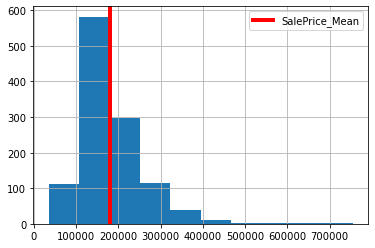

In [38]:
df['SalePrice'].hist()
mean = np.mean(df['SalePrice'])
plt.axvline(mean,linewidth=4,color='r',label='SalePrice_Mean')
plt.legend()
plt.show()

### Observations:
        - The house price ranges from 34900.00 to 755000.00.
        - The average house price is 181477.00.

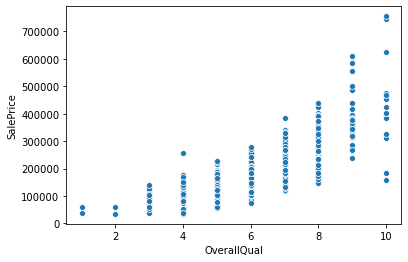

In [39]:
sns.scatterplot(df['OverallQual'],df['SalePrice'])
plt.show()

### Observations:
        The average House price increases as the 'rate of overall material and finish of the house' increases i.e.,
        If 'rate of overall material and finish of the house' is 10(Very Excellent) then average house price is higher.
        If 'rate of overall material and finish of the house' is 1(Very Poor) then average house price is lower.

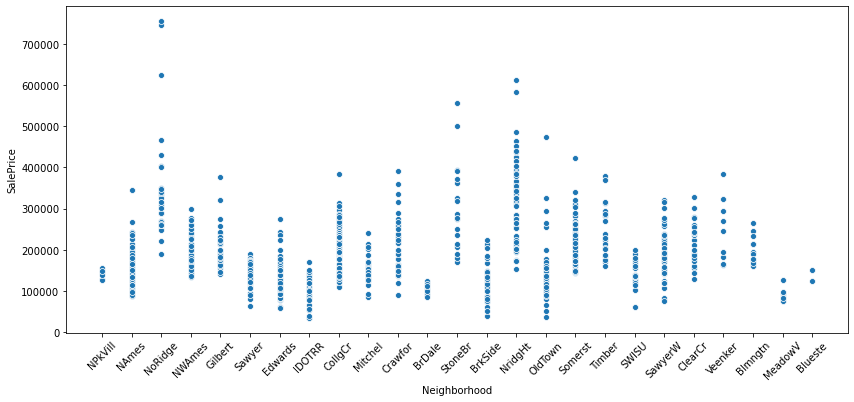

   Neighborhood      SalePrice
15      NoRidge  341260.228571
16      NridgHt  312548.655738
22      StoneBr  301145.736842
24      Veenker  246833.333333
23       Timber  240579.291667


   Neighborhood      SalePrice
10      MeadowV   88444.444444
9        IDOTRR  101322.666667
2        BrDale  104081.818182
3       BrkSide  122836.000000
7       Edwards  128544.216867


In [40]:
plt.figure(figsize=(14,6))
plt.xticks(rotation=45)
sns.scatterplot(df['Neighborhood'],df['SalePrice'])
plt.show()

locs=df.groupby('Neighborhood')['SalePrice'].mean().reset_index()
print(locs.sort_values('SalePrice',ascending=False)[0:5])
print('\n')
print(locs.sort_values('SalePrice',ascending=True)[0:5])

### Observations:
        The average House price is higher in NoRidge(Northridge), NridgHt(Northridge Heights), StoneBr(Stone Brook), Veenker(Veenker) locations within Ames city limits.
        The average House price is lower at MeadowV(Meadow Village), IDOTRR(Iowa DOT and Rail Road), BrDale(Briardale), BrkSide(Brookside) locations within Ames city limits.

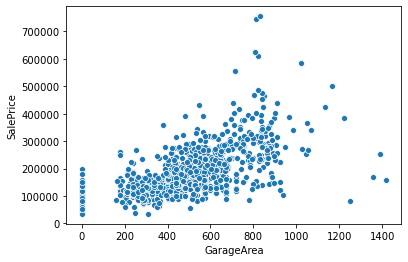

In [41]:
sns.scatterplot(df['GarageArea'],df['SalePrice'])
plt.show()

### Observations:
        The average House price increases as the 'size of garage in square feet' increases.

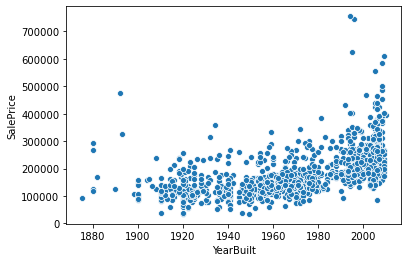

In [42]:
sns.scatterplot(df['YearBuilt'],df['SalePrice'])
plt.show()

### Observations:
        Newer the house, higher is the average house price.

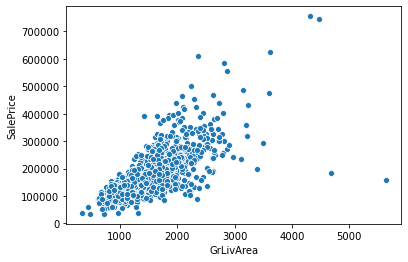

In [43]:
sns.scatterplot(df['GrLivArea'],df['SalePrice'])
plt.show()

### Observations:
        The average price of House increases as the 'above ground living area in square feet of house' increases.

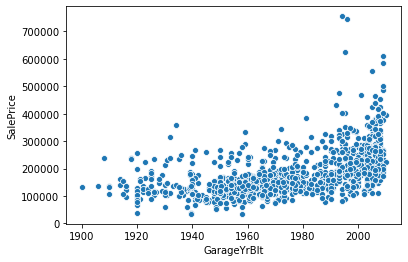

In [44]:
sns.scatterplot(df['GarageYrBlt'],df['SalePrice'])
plt.show()

### Observations:
        Newer the Garage, higher is the average house price.

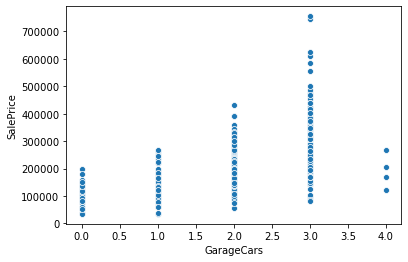

In [45]:
sns.scatterplot(df['GarageCars'],df['SalePrice'])
plt.show()

### Observations:
        The average price of House increases as the 'size of garage in car capacity' increases.

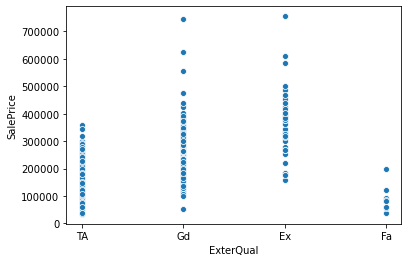

In [46]:
sns.scatterplot(df['ExterQual'],df['SalePrice'])
plt.show()

### Observations:
        The average price of House changes as the 'the quality of the material used on the exterior' changes i.e., 
        If 'the quality of the material used on the exterior' is Gd(Good) or Ex(Excellent) then the average house price is higher.
        If 'the quality of the material used on the exterior' is of Ta(Average/Typical) or Fa(Fair) then the average house price is lower.

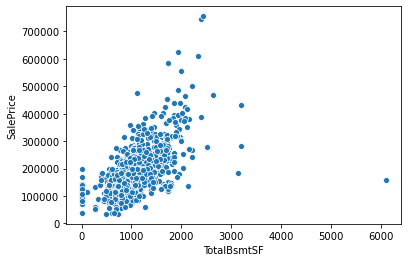

In [47]:
sns.scatterplot(df['TotalBsmtSF'],df['SalePrice'])
plt.show()

### Observations:
        The average price of House increases as the 'total square feet of basement area of house' increases.

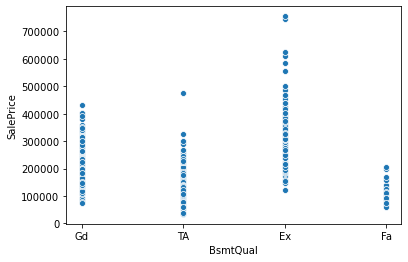

In [48]:
sns.scatterplot(df['BsmtQual'],df['SalePrice'])
plt.show()

### Observations:
        The average price of House changes based on 'the height of the basement' i.e.,
        If 'the height of the basement' is Ex(Excellent-100+ inches), Gd(Good-90-99 inches) or Ta(Average/Typical-80-89 inches) then the average house price is higher.
        If 'the height of the basement' is of Fa(Fair-70-79 inches) then the average house price is lower.

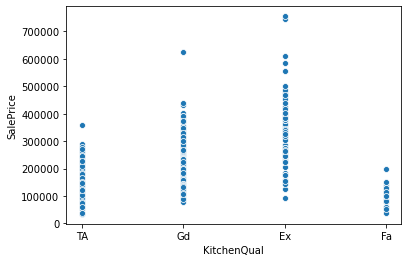

In [49]:
sns.scatterplot(df['KitchenQual'],df['SalePrice'])
plt.show()

### Observations:
        The average price of House changes based on the 'kitchen quality' i.e.,
        If 'kitchen quality' is Ex(Excellent) or Gd(Good) then the average house price is higher.
        If 'kitchen quality' is of Ta(Average/Typical) or Fa(Fair) then the average house price is lower.

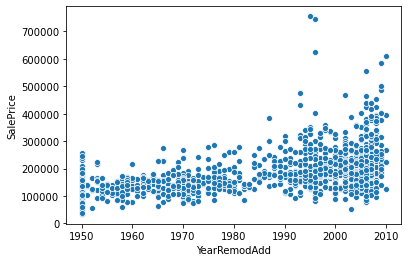

In [50]:
sns.scatterplot(df['YearRemodAdd'],df['SalePrice'])
plt.show()

### Observations:
        If recently the house has undergone remodelling or some additions then the average house price will be higher.

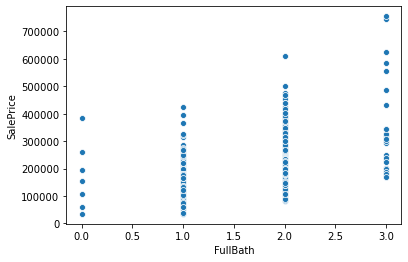

In [51]:
sns.scatterplot(df['FullBath'],df['SalePrice'])
plt.show()
# In order to qualify as a “full” bathroom, the room must contain four key elements: 
# toilet, sink, bathtub, and shower.

### Observations:
        The average price of House increases as the 'number of full bathrooms above grade' increases.

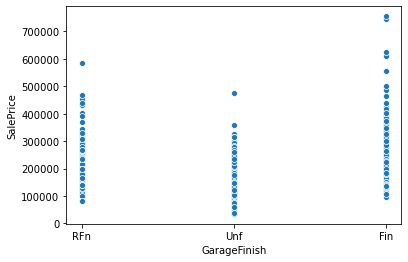

In [52]:
sns.scatterplot(df['GarageFinish'],df['SalePrice'])
plt.show()

### Observations:
        The average price of House changes based on the 'interior finish of the garage' i.e.,
        If 'interior finish of the garage' is Fin(Finished) or RFn(Rough Finished) then the average house price is higher.
        If 'interior finish of the garage' is of Unf(Unfinished) then the average house price is lower.

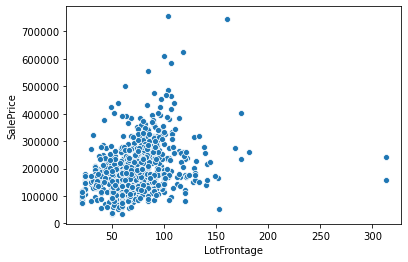

In [53]:
sns.scatterplot(df['LotFrontage'],df['SalePrice'])
plt.show()

### Observations:
        The average price of House increases as the 'linear feet of street connected to property' increases.

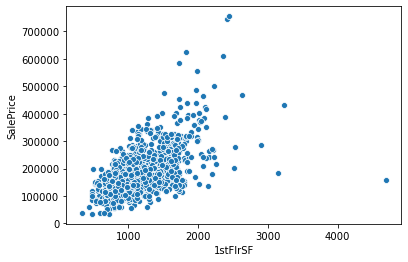

In [54]:
sns.scatterplot(df['1stFlrSF'],df['SalePrice'])
plt.show()

### Observations:
        The average price of House increases as the 'first floor square feet of house' increases.

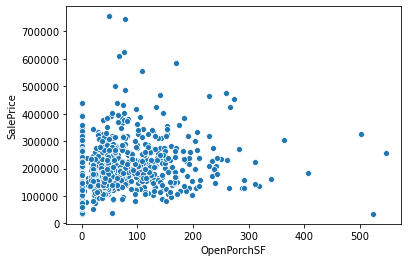

In [55]:
sns.scatterplot(df['OpenPorchSF'],df['SalePrice'])
plt.show()

### Observations:
        The average price of House decreases as the 'open porch area in square feet' increases.

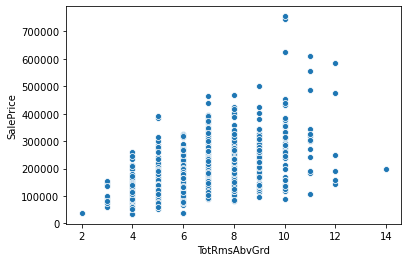

In [56]:
sns.scatterplot(df['TotRmsAbvGrd'],df['SalePrice'])
plt.show()

### Observations:
        The average price of House increases as the 'total number of rooms above grade (does not include bathrooms)' increases.

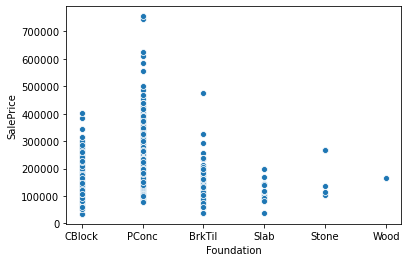

In [57]:
sns.scatterplot(df['Foundation'],df['SalePrice'])
plt.show()

### Observations:
        The average price of House increases based on 'the type of foundation' i.e., 
        If 'the type of foundation' is PConc(Poured Contrete) then the average house price is extremely higher.
        If 'the type of foundation' is of CBlock(Cinder Block) or BrkTil(Brick & Tile) then the average house price is higher.
        If 'the type of foundation' is of Stone(Stone) Slab(Slab) or Wood(wood) then the average house price is lower.

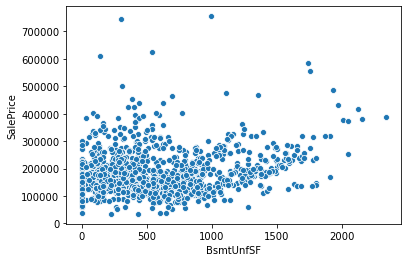

In [58]:
sns.scatterplot(df['BsmtUnfSF'],df['SalePrice'])
plt.show()

### Observations:
        The average price of House decreases as the 'unfinished square feet of basement area of house' increases.

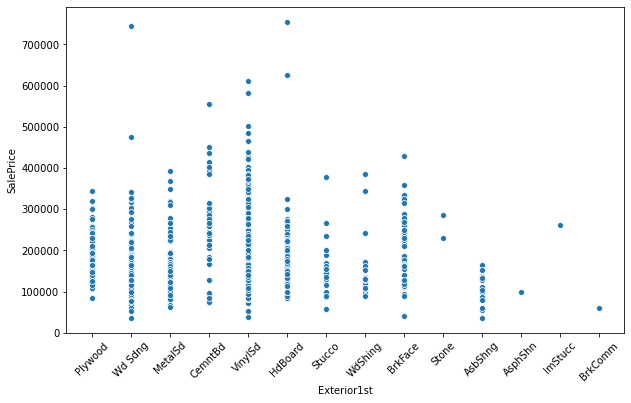

   Exterior1st      SalePrice
6      ImStucc  262000.000000
9        Stone  258500.000000
4      CemntBd  242928.476190
11     VinylSd  215359.676768
3      BrkFace  198391.463415


   Exterior1st      SalePrice
2      BrkComm   60000.000000
1      AsphShn  100000.000000
0      AsbShng  107774.263158
7      MetalSd  148498.196629
12     Wd Sdng  152572.724138


In [59]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
sns.scatterplot(df['Exterior1st'],df['SalePrice'])
plt.show()

e1=df.groupby('Exterior1st')['SalePrice'].mean().reset_index()
print(e1.sort_values('SalePrice',ascending=False)[0:5])
print('\n')
print(e1.sort_values('SalePrice',ascending=True)[0:5])

### Observations:
        The average price of House changes based on the 'Exterior covering on house' i.e., 
            If 'Exterior covering on house' is ImStucc(Imitation Stucco), Stone(Stone), CmentBd(Cement Board), VinylSd(Vinyl Siding) then the average house price is higher.
            If 'Exterior covering on house' is of BrkComm(Brick Common), AsphShn(Asphalt Shingles), AsbShng(Asbestos Shingles), MetalSd(Metal Siding) then the average house price is lower.

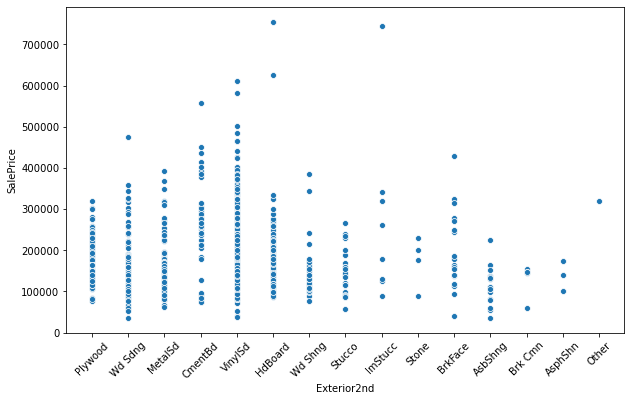

   Exterior2nd      SalePrice
8        Other  319000.000000
6      ImStucc  273712.500000
4      CmentBd  247940.380952
12     VinylSd  215607.100775
3      BrkFace  194772.500000


   Exterior2nd      SalePrice
0      AsbShng  114372.833333
2      Brk Cmn  131300.000000
1      AsphShn  138000.000000
7      MetalSd  148570.398844
13     Wd Sdng  152218.969697


In [60]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
sns.scatterplot(df['Exterior2nd'],df['SalePrice'])
plt.show()

e2=df.groupby('Exterior2nd')['SalePrice'].mean().reset_index()
print(e2.sort_values('SalePrice',ascending=False)[0:5])
print('\n')
print(e2.sort_values('SalePrice',ascending=True)[0:5])

### Observations:
        The average price of House changes based on the 'Exterior covering on house (if more than one material)' changes i.e., 
        If 'Exterior covering on house' is ImStucc(Imitation Stucco), CmentBd(Cement Board), VinylSd(Vinyl Siding) then the average house price is higher.
        If 'Exterior covering on house' is of AsbShng(Asbestos Shingles), Brk Cmn(Brick Common), MetalSd(Metal Siding) then the average house price is lower.

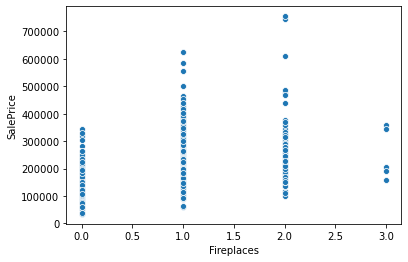

In [61]:
sns.scatterplot(df['Fireplaces'],df['SalePrice'])
plt.show()

### Observations:
        The average price of House increases as 'the number of fireplaces' increases.

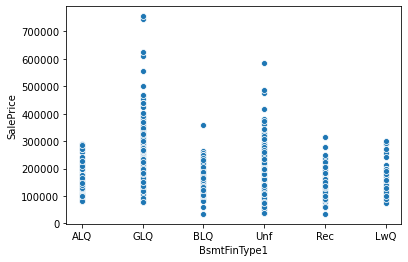

In [62]:
sns.scatterplot(df['BsmtFinType1'],df['SalePrice'])
plt.show()

### Observations:
        The average price of House changes based on the 'rating of the basement finished area' i.e.,
            If 'rating of the basement finished area' is of GLQ(Good Living Quarters) or Unf(Unfinshed) then the average house price is higher.
            If 'rating of the basement finished area' is of BLQ(Below Average Living Quarters), Rec(Average Rec Room), ALQ(Average Living Quarters), LwQ(Low Quality) then the average house price is lower.

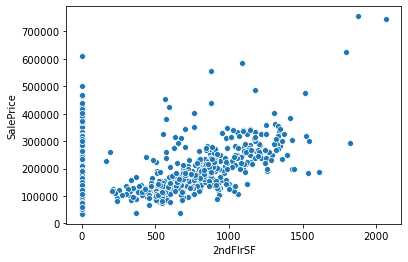

In [63]:
sns.scatterplot(df['2ndFlrSF'],df['SalePrice'])
plt.show()

### Observations:
        The average price of House increases as the 'Second floor square feet of house' increases.

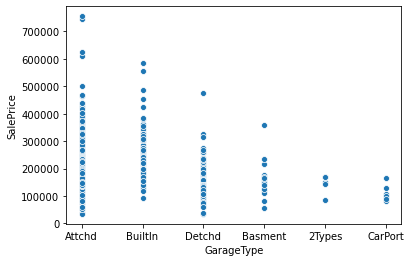

In [64]:
sns.scatterplot(df['GarageType'],df['SalePrice'])
plt.show()

### Observations:
        The average price of house changes based on the 'garage location' i.e.,
            If 'garage location' is of Attchd(Attached to home) or BuiltIn(Built-In) then the average house price is higher.
            If 'garage location' is of 2Types(More than one type of garage) or CarPort(Car Port) then the average house price is lower.

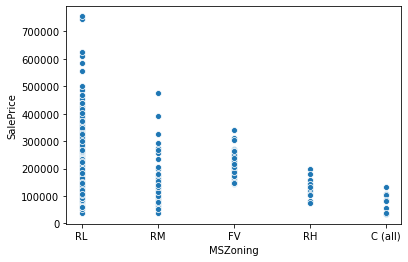

In [65]:
sns.scatterplot(df['MSZoning'],df['SalePrice'])
plt.show()

### Observations:
        The average price of house changes based on the 'the general zoning classification of the sale' i.e.,
            If 'the general zoning classification of the sale' is of RL(Residential Low Density) or RM(Residential Medium Density) then the average house price is higher.
            If 'the general zoning classification of the sale' is of C(all)(Commercial) or RH(Residential High Density) then the average house price is lower.

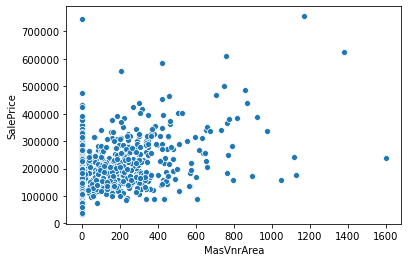

In [66]:
sns.scatterplot(df['MasVnrArea'],df['SalePrice'])
plt.show()

### Observations:
        The average price of house increases as the 'masonry veneer area in square feet' increases.

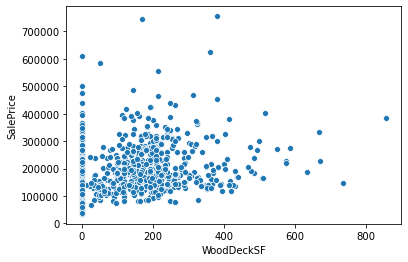

In [67]:
sns.scatterplot(df['WoodDeckSF'],df['SalePrice'])
plt.show()

### Observations:
        The average price of house increases as the 'wood deck area in square feet' increases.

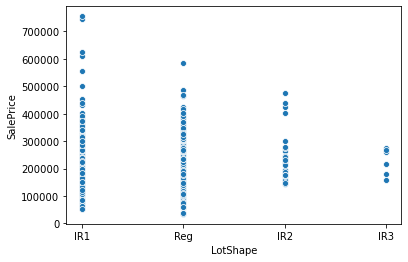

In [68]:
sns.scatterplot(df['LotShape'],df['SalePrice'])
plt.show()

### Observations:
        The average price of house changes based on the 'general shape of property' i.e.,
            If 'general shape of property' is of IR1(Slightly irregular) or Reg(Regular) then the average house price is higher.
            If 'general shape of property' is of IR2(Moderately Irregular) or IR3(Irregular) then the average house price is lower.

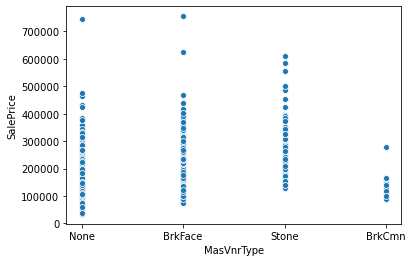

In [69]:
sns.scatterplot(df['MasVnrType'],df['SalePrice'])
plt.show()

### Observations:
        The average price of house changes based on the 'the masonry veneer type' i.e.,
            If 'the masonry veneer type' is of BrkFace(Brick Face) or Stone(Stone) then the average house price is higher.
            If 'the masonry veneer type' is of BrkCmm(Brick Common) then the average house price is lower.

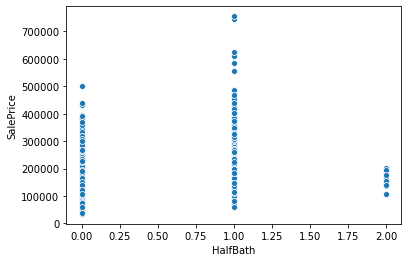

In [70]:
sns.scatterplot(df['HalfBath'],df['SalePrice'])
plt.show()

### Observations:
        The average price of house is higher if 'number of half baths above grade' is 1 or 0.
        The average price of house decreases if 'number of half baths above grade' is more than 1.

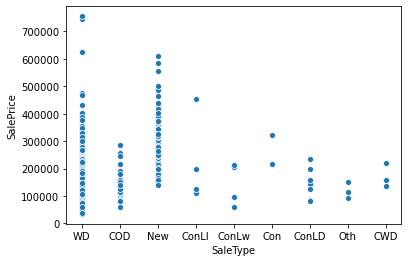

In [71]:
sns.scatterplot(df['SaleType'],df['SalePrice'])
plt.show()

### Observations:
        The average price of house changes based on 'the type of sale' i.e.,
            If 'the type of sale' is of WD(Warranty Deed - Conventional) or New(Home just constructed and sold) then the average house price is higher.
            If 'the type of sale' is of COD(Court Officer Deed/Estate), ConLw(Contract Low Down payment and low interest), ConLD(Contract Low Down), CWD(Warranty Deed - Cash) then the average house price is lower.

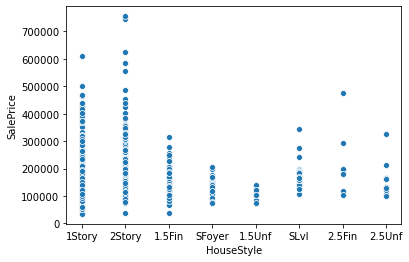

In [72]:
sns.scatterplot(df['HouseStyle'],df['SalePrice'])
plt.show()

### Observations:
        The average price of house changes based on the 'houseStyle' i.e.,
            If 'houseStyle' is of 2 Story or 1 Story then the average house price is higher.
            If 'houseStyle' is of 1.5Unf(One and one-half story: 2nd level unfinished) or SFoyer(Split Foyer) then the average house price is lower.

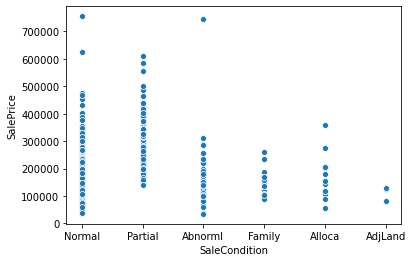

In [73]:
sns.scatterplot(df['SaleCondition'],df['SalePrice'])
plt.show()

### Observations:
        The average price of house changes based on the 'SaleCondition' i.e.,
            If 'SaleCondition' is of Normal(Normal Sale) or Partial(Home was not completed when last assessed (associated with New Homes)) then the average house price is higher.
            If 'SaleCondition' is of AdjLand(Adjoining Land Purchase) or Family(Sale between family members) then the average house price is lower.

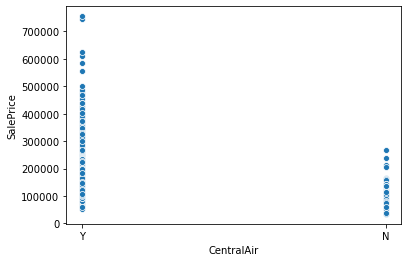

In [74]:
sns.scatterplot(df['CentralAir'],df['SalePrice'])
plt.show()

### Observations:
        The average house price is higher where the house have 'central air conditioning'.

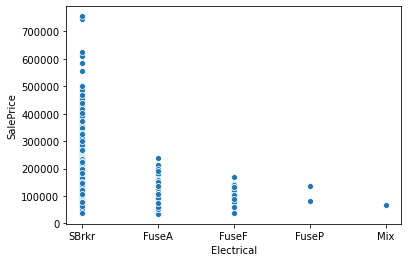

In [75]:
sns.scatterplot(df['Electrical'],df['SalePrice'])
plt.show()

### Observations:
        The average price of house changes based on the 'Electrical system' i.e.,
            If 'Electrical system' is of SBrkr(Standard Circuit Breakers & Romex) then the average house price is higher.
            If 'Electrical system' is of Mix(Mixed), FuseF(60 AMP Fuse Box and mostly Romex wiring (Fair)) or FuseP(60 AMP Fuse Box and mostly knob & tube wiring (poor)) then the average house price is lower.

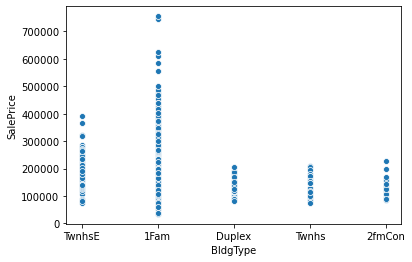

In [76]:
sns.scatterplot(df['BldgType'],df['SalePrice'])
plt.show()

### Observations:
        The average price of house changes based on the 'type of dwelling' i.e.,
            If 'type of dwelling' is of 1Fam(Single-family Detached) then the average house price is higher.
            If 'type of dwelling' is of TwnhsI(Townhouse Inside Unit), Duplx(Duplex) or 2FmCon(Two-family Conversion; originally built as one-family dwelling) then the average house price is lower.

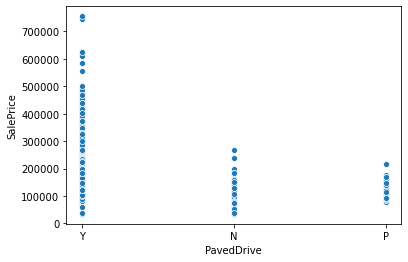

In [77]:
sns.scatterplot(df['PavedDrive'],df['SalePrice'])
plt.show()

### Observations:
        The average price of house changes based on the 'paved driveway' i.e.,
            If 'paved driveway' is of Paved then the average house price is higher.
            If 'paved driveway' is of Partial Pavement or Dirt/Gravel then the average house price is lower.

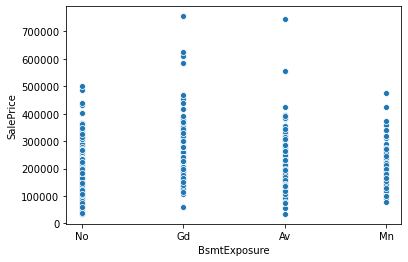

In [78]:
sns.scatterplot(df['BsmtExposure'],df['SalePrice'])
plt.show()

### Observations:
        The average price of house changes based on the 'BsmtExposure(refers to walkout or garden level walls)' i.e.,
            If 'BsmtExposure' is of Good Exposure or Average Exposure then the average house price is higher.
            If 'BsmtExposure' is of Mimimum Exposure then the average house price is lower.

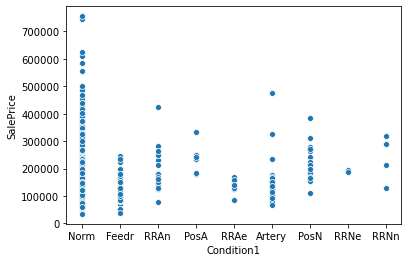

  Condition1      SalePrice
8       RRNn  238000.000000
3       PosA  237833.333333


  Condition1      SalePrice
0     Artery  137926.315789
5       RRAe  139044.444444


In [79]:
sns.scatterplot(df['Condition1'],df['SalePrice'])
plt.show()

c1 = df.groupby('Condition1')['SalePrice'].mean().reset_index()
print(c1.sort_values('SalePrice',ascending=False)[:2])
print('\n')
print(c1.sort_values('SalePrice',ascending=True)[:2])

### Observations:
        The average price of house changes based on the 'Condition1(proximity to various conditions)' i.e.,
            If 'Condition1' is of RRNn(Within 200' of North-South Railroad) or PosA(Adjacent to postive off-site feature) then the average house price is higher.
            If 'Condition1' is of Artery(Adjacent to arterial street) or RRAe(Adjacent to East-West Railroad) then the average house price is lower.

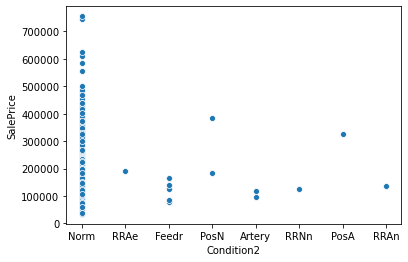

In [80]:
sns.scatterplot(df['Condition2'],df['SalePrice'])
plt.show()

### Observations:
        The average price of house changes based on the 'Condition2(proximity to various conditions(if more than one is present))' i.e.,
            If 'Condition2' is of Norm(Normal) then the average house price is higher.
            If 'Condition2' is of Artery(Adjacent to arterial street) or Feedr(Adjacent to feeder street) then the average house price is lower.

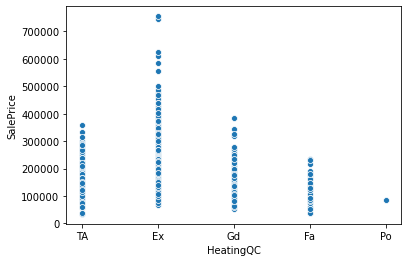

In [81]:
sns.scatterplot(df['HeatingQC'],df['SalePrice'])
plt.show()

### Observations:
        The average price of house changes based on the 'HeatingQC(heating quality and condition)' i.e.,
            If 'HeatingQC' is of EX(Excellent) then the average house price is higher.
            If 'HeatingQC' is of Gd(Good) or TA(Average/Typical) then the average house price is above average.
            If 'HeatingQC' is of po(poor) then the average house price is lower.

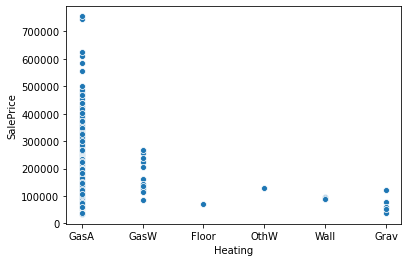

In [82]:
sns.scatterplot(df['Heating'],df['SalePrice'])
plt.show()

### Observations:
        The average price of house changes based on the 'type of heating' i.e.,
            If 'type of heating' is of GasA(as forced warm air furnace) then the average house price is higher.
            If 'type of heating' is of GasW(Gas hot water or steam heat) or Grav(Gravity furnace) then the average house price is lower.

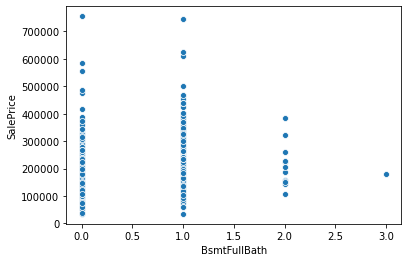

In [83]:
sns.scatterplot(df['BsmtFullBath'],df['SalePrice'])
plt.show()

### Observations:
        The average price of House is higher if 'number of full bathrooms on basement' is 0 or 1.

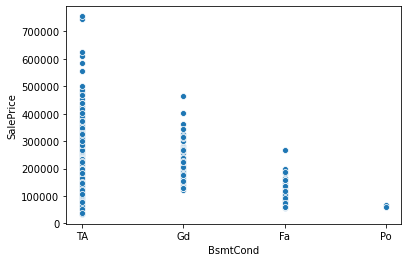

In [84]:
sns.scatterplot(df['BsmtCond'],df['SalePrice'])
plt.show()

### Observations:
        The average price of house changes based on the 'BsmtCond(the general condition of the basement)' i.e.,
            If 'the general condition of the basement' is of TA(Average/Typical) then the average house price is higher.
            If 'the general condition of the basement' is of Gd(Good) or Fa(Fair) then the average house price is above average.
            If 'the general condition of the basement' is of Po(Poor) then the average house price is lower.

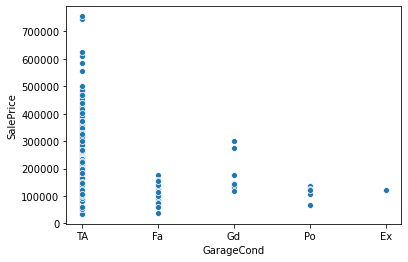

In [85]:
sns.scatterplot(df['GarageCond'],df['SalePrice'])
plt.show()

### Observations:
        The average price of house changes based on the 'GarageCond(Garage condition)' i.e.,
            If 'Garage condition' is of TA(Average/Typical) then the average house price is higher.
            If 'Garage condition' is of Gd(Good) then the average house price is above average.
            If 'Garage condition' is of Fa(Fair) or Po(Poor) then the average house price is lower.

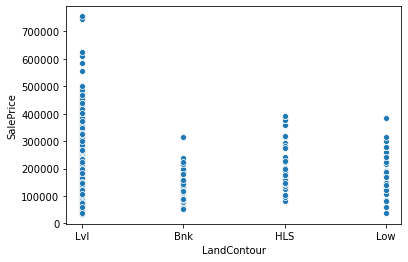

In [86]:
sns.scatterplot(df['LandContour'],df['SalePrice'])
plt.show()

### Observations:
        The average price of house changes based on the 'Flatness of the property' i.e.,
            If 'Flatness of the property' is of Lvl(Near Flat/Level) then the average house price is higher.
            If 'Flatness of the property' is of HLS(Hillside - Significant slope from side to side) or LOW(Depression) or Bnk(Banked - Quick and significant rise from street grade to building) then the average house price is lower.

## Visualizations/EDA Conclusions

### Features which are affecting the price positively are as follows:

    If 'rate of overall material and finish of the house' is 10(Very Excellent) then average house price is higher.
    The average House price is higher in NoRidge(Northridge), NridgHt(Northridge Heights), StoneBr(Stone Brook), Veenker(Veenker) locations within Ames city limits.
    The average House price increases as the 'size of garage in square feet' increases.
    Newer the house, higher is the average house price.
    The average price of House increases as the 'above ground living area in square feet of house' increases.
    Newer the Garage, higher is the average house price.
    The average price of House increases as the 'size of garage in car capacity' increases.
    If 'the quality of the material used on the exterior' is Gd(Good) or Ex(Excellent) then the average house price is higher.
    The average price of House increases as the 'total square feet of basement area of house' increases.
    If 'the height of the basement' is Ex(Excellent-100+ inches), Gd(Good-90-99 inches) or Ta(Average/Typical-80-89 inches) then the average house price is higher.
    If 'kitchen quality' is Ex(Excellent) or Gd(Good) then the average house price is higher.
    If recently the house has undergone remodeling or some additions then the average house price will be higher.
    The average price of House increases as the 'number of full bathrooms above grade' increases.
    If 'interior finish of the garage' is Fin(Finished) or RFn(Rough Finished) then the average house price is higher.
    The average price of House increases as the 'linear feet of street connected to property' increases.
    The average price of House increases as the 'first floor square feet of house' increases.
    The average price of House increases as the 'total number of rooms above grade (does not include bathrooms)' increases.
    If 'the type of foundation' is PConc(Poured Contrete) then the average house price is extremely higher.
    If 'the type of foundation' is of CBlock(Cinder Block) or BrkTil(Brick & Tile) then the average house price is higher.
    If 'Exterior covering on house' is ImStucc(Imitation Stucco), Stone(Stone), CmentBd(Cement Board), VinylSd(Vinyl Siding) then the average house price is higher.
    If 'Exterior covering on house' is ImStucc(Imitation Stucco), CmentBd(Cement Board), VinylSd(Vinyl Siding) then the average house price is higher.
    The average price of House increases as 'the number of fireplaces' increases.
    If 'rating of the basement finished area' is of GLQ(Good Living Quarters) or Unf(Unfinshed) then the average house price is higher.
    The average price of House increases as the 'Second floor square feet of house' increases.
    If 'garage location' is of Attchd(Attached to home) or BuiltIn(Built-In) then the average house price is higher.
    If 'the general zoning classification of the sale' is of RL(Residential Low Density) or RM(Residential Medium Density) then the average house price is higher.
    The average price of house increases as the 'masonry veneer area in square feet' increases.
    The average price of house increases as the 'wood deck area in square feet' increases.
    If 'general shape of property' is of IR1(Slightly irregular) or Reg(Regular) then the average house price is higher.
    If 'the masonry veneer type' is of BrkFace(Brick Face) or Stone(Stone) then the average house price is higher.
    The average price of house is higher if 'number of half baths above grade' is 1 or 0.
    If 'the type of sale' is of WD(Warranty Deed - Conventional) or New(Home just constructed and sold) then the average house price is higher.
    If 'houseStyle' is of 2 Story or 1 Story then the average house price is higher.
    If 'SaleCondition' is of Normal(Normal Sale) or Partial(Home was not completed when last assessed (associated with New Homes)) then the average house price is higher.
    The average house price is higher where the house have 'central air conditioning'.
    If 'Electrical system' is of SBrkr(Standard Circuit Breakers & Romex) then the average house price is higher.
    If 'type of dwelling' is of 1Fam(Single-family Detached) then the average house price is higher.
    If 'paved driveway' is of Paved then the average house price is higher.
    If 'BsmtExposure' is of Good Exposure or Average Exposure then the average house price is higher.
    If 'Condition1' is of RRNn(Within 200' of North-South Railroad) or PosA(Adjacent to postive off-site feature) then the average house price is higher.
    If 'Condition2' is of Norm(Normal) then the average house price is higher.
    If 'HeatingQC' is of EX(Excellent) then the average house price is higher.
    If 'HeatingQC' is of Gd(Good) or TA(Average/Typical) then the average house price is above average.
    If 'type of heating' is of GasA(as forced warm air furnace) then the average house price is higher.
    The average price of House is higher if 'number of full bathrooms on basement' is 0 or 1.
    If 'the general condition of the basement' is of TA(Average/Typical) then the average house price is higher.
    If 'the general condition of the basement' is of Gd(Good) or Fa(Fair) then the average house price is above average.
    If 'Garage condition' is of TA(Average/Typical) then the average house price is higher.
    If 'Garage condition' is of Gd(Good) then the average house price is above average.
    If 'Flatness of the property' is of Lvl(Near Flat/Level) then the average house price is higher.
    

### Features which are affecting the price negatively are as follows:

    If 'rate of overall material and finish of the house' is 1(Very Poor) then average house price is lower.
    The average House price is lower at MeadowV(Meadow Village), IDOTRR(Iowa DOT and Rail Road), BrDale(Briardale), BrkSide(Brookside) locations within Ames city limits.
    If 'the quality of the material used on the exterior' is of Ta(Average/Typical) or Fa(Fair) then the average house price is lower.
    If 'the height of the basement' is of Fa(Fair-70-79 inches) then the average house price is lower.
    If 'kitchen quality' is of Ta(Average/Typical) or Fa(Fair) then the average house price is lower.
    If 'interior finish of the garage' is of Unf(Unfinished) then the average house price is lower.
    The average price of House decreases as the 'open porch area in square feet' increases.
    If 'the type of foundation' is of Stone(Stone) Slab(Slab) or Wood(wood) then the average house price is lower.
    The average price of House decreases as the 'unfinished square feet of basement area of house' increases.
    If 'Exterior covering on house' is of BrkComm(Brick Common), AsphShn(Asphalt Shingles), AsbShng(Asbestos Shingles), MetalSd(Metal Siding) then the average house price is lower.
    If 'Exterior covering on house' is of AsbShng(Asbestos Shingles), Brk Cmn(Brick Common), MetalSd(Metal Siding) then the average house price is lower.
    If 'rating of the basement finished area' is of BLQ(Below Average Living Quarters), Rec(Average Rec Room), ALQ(Average Living Quarters), LwQ(Low Quality) then the average house price is lower.
    If 'garage location' is of 2Types(More than one type of garage) or CarPort(Car Port) then the average house price is lower.
    If 'the general zoning classification of the sale' is of C(all)(Commercial) or RH(Residential High Density) then the average house price is lower.
    If 'general shape of property' is of IR2(Moderately Irregular) or IR3(Irregular) then the average house price is lower.
    If 'the masonry veneer type' is of BrkCmm(Brick Common) then the average house price is lower.
    The average price of house decreases if 'number of half baths above grade' is more than 1.
    If 'the type of sale' is of COD(Court Officer Deed/Estate), ConLw(Contract Low Down payment and low interest), ConLD(Contract Low Down), CWD(Warranty Deed - Cash) then the average house price is lower.
    If 'houseStyle' is of 1.5Unf(One and one-half story: 2nd level unfinished) or SFoyer(Split Foyer) then the average house price is lower.
    If 'SaleCondition' is of AdjLand(Adjoining Land Purchase) or Family(Sale between family members) then the average house price is lower.
    If 'Electrical system' is of Mix(Mixed), FuseF(60 AMP Fuse Box and mostly Romex wiring (Fair)) or FuseP(60 AMP Fuse Box and mostly knob & tube wiring (poor)) then the average house price is lower.
    If 'type of dwelling' is of TwnhsI(Townhouse Inside Unit), Duplx(Duplex) or 2FmCon(Two-family Conversion; originally built as one-family dwelling) then the average house price is lower.
    If 'paved driveway' is of Partial Pavement or Dirt/Gravel then the average house price is lower.
    If 'BsmtExposure' is of Mimimum Exposure then the average house price is lower.
    If 'Condition1' is of Artery(Adjacent to arterial street) or RRAe(Adjacent to East-West Railroad) then the average house price is lower.
    If 'Condition2' is of Artery(Adjacent to arterial street) or Feedr(Adjacent to feeder street) then the average house price is lower.
    If 'HeatingQC' is of po(poor) then the average house price is lower.
    If 'type of heating' is of GasW(Gas hot water or steam heat) or Grav(Gravity furnace) then the average house price is lower.
    If 'the general condition of the basement' is of Po(Poor) then the average house price is lower.
    If 'Garage condition' is of Fa(Fair) or Po(Poor) then the average house price is lower.
    If 'Flatness of the property' is of HLS(Hillside - Significant slope from side to side) or LOW(Depression) or Bnk(Banked - Quick and significant rise from street grade to building) then the average house price is lower.

## Checking Outliers

    Let's check randomly, whether some features have outliers or not

In [87]:
df2 = hd.copy()

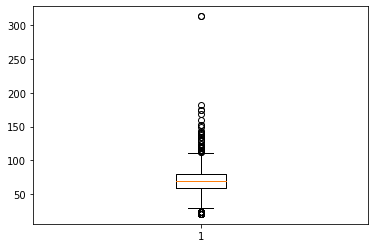

In [88]:
plt.boxplot(df2['LotFrontage'])
plt.show()

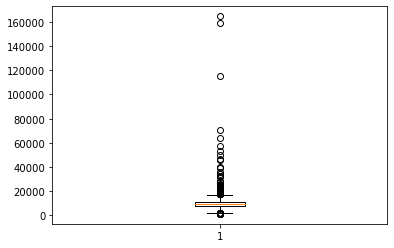

In [89]:
plt.boxplot(df2['LotArea'])
plt.show()

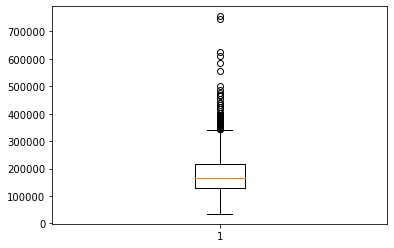

In [90]:
plt.boxplot(df2['SalePrice'])
plt.show()

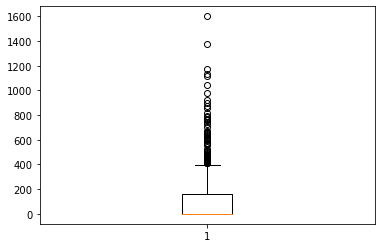

In [91]:
plt.boxplot(df2['MasVnrArea'])
plt.show()

### Observations:
    From above boxplots, it is clear that outliers exists.

## Removing Outliers

### 1. Z-score Method

In [92]:
from scipy.stats import zscore

z=np.abs(zscore(df2))

In [93]:
# Threshold=5
np.where(z>5)

(array([  32,   47,   51,   66,   73,  103,  113,  119,  141,  141,  195,
         229,  241,  284,  305,  309,  361,  361,  361,  361,  363,  401,
         423,  434,  484,  500,  507,  553,  591,  592,  592,  592,  592,
         592,  592,  652,  686,  689,  691,  691,  691,  697,  713,  720,
         801,  823,  839,  839,  866,  897,  944,  951,  956, 1011, 1038,
        1047, 1053, 1066, 1082, 1123], dtype=int64),
 array([27, 40, 20, 40, 40, 47,  1, 19, 11, 21, 35, 40, 21, 40,  9, 19,  9,
        11, 20, 27, 27, 40, 21,  5, 40, 40, 40, 27, 40,  0,  1,  6,  8,  9,
        11, 27, 40,  1,  5, 11, 21,  5, 20,  5, 40, 47,  5, 21, 40, 27, 27,
        40, 20, 40,  1,  5,  0, 40,  1,  1], dtype=int64))

In [94]:
# Threshold=5
train = df2[(z<5).all(axis=1)]

In [95]:
print(df2.shape,'\t',train.shape)

(1168, 51) 	 (1120, 51)


In [96]:
# percentage loss of data
per_loss=((1168-1120)/1168)*100
per_loss

4.10958904109589

### Observations:    
    Since significance amount of data is not lost after removing outliers we can go ahead.

## Checking Skewness

In [97]:
train.skew()

LotFrontage       0.666830
LotArea           2.749271
OverallQual       0.073673
YearBuilt        -0.570363
YearRemodAdd     -0.494668
MasVnrArea        2.156761
BsmtFinSF1        0.675199
BsmtUnfSF         0.890372
TotalBsmtSF       0.358953
1stFlrSF          0.813473
2ndFlrSF          0.753696
GrLivArea         0.696466
FullBath          0.010919
HalfBath          0.659156
TotRmsAbvGrd      0.562193
Fireplaces        0.664440
GarageYrBlt      -0.536882
GarageCars       -0.350368
GarageArea        0.107882
WoodDeckSF        1.326348
OpenPorchSF       1.765358
SalePrice         1.284647
MSZoning         -1.774503
LotShape         -0.647723
LandContour      -3.253378
LotConfig        -1.140676
Neighborhood      0.046703
Condition2      -13.570748
BldgType          2.278428
HouseStyle        0.286989
RoofStyle         1.503820
Exterior1st      -0.623155
Exterior2nd      -0.603685
MasVnrType       -0.101231
ExterQual        -1.787354
Foundation       -0.108853
BsmtQual         -1.356288
B

### Observations:    
    Acceptable range of skewness is +\- 0.6, hence data is skewed.

## Splitting Data

In [98]:
x=train.drop('SalePrice',axis=1)
y=train['SalePrice']

In [99]:
print(x.shape,'\t',y.shape)

(1120, 50) 	 (1120,)


## Removing Skewness

In [100]:
from sklearn.preprocessing import power_transform

x=power_transform(x,method='yeo-johnson')

## Standardizing Data

In [101]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x=sc.fit_transform(x)

# Model Training And Testing

In [102]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [103]:
# finding the best random_state

s=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    y_pred=mod.predict(x_test)
    mod_acc=r2_score(y_test,y_pred)
    if mod_acc>s:
        s=mod_acc
        best_random_state=i
        
print(f" Best r2_score is {s*100} which is found on random_state {best_random_state}")

 Best r2_score is 88.13043385837977 which is found on random_state 63


In [104]:
# finding the best cv

cv=0
for i in range(2,12):
    cv_score=cross_val_score(mod,x,y,cv=i).mean()
    if cv_score>cv:
        cv=cv_score
        best_cv=i
        
print(f" Best Cross_val_score is {cv*100} which is found on cv = {best_cv}")        

 Best Cross_val_score is 85.85819819367543 which is found on cv = 7


In [105]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=best_random_state)

# Finding The Best Model

In [106]:
mod_list=[LinearRegression(),KNeighborsRegressor(),RandomForestRegressor(),AdaBoostRegressor(),
          GradientBoostingRegressor()]

In [107]:
for i in mod_list:
    print(i)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    mod_acc=r2_score(y_test,y_pred)
    print('r2_score:',mod_acc*100)
    cv_score=cross_val_score(i,x,y,cv=best_cv).mean()
    print('cross_val_score:',cv_score*100)
    print('Difference b\w r2_score & cross_val_score is:',(mod_acc*100)-(cv_score*100))
    print('Training score:',i.score(x_train,y_train)*100)
    print('Error:')
    print('Mean absolute error:',mean_absolute_error(y_test,y_pred))
    print('Mean squared error:',mean_squared_error(y_test,y_pred))
    print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,y_pred)))
    print('*****************************************************************************************')

LinearRegression()
r2_score: 88.13043385837977
cross_val_score: 85.85819819367543
Difference b\w r2_score & cross_val_score is: 2.27223566470434
Training score: 86.59705250807323
Error:
Mean absolute error: 19790.4546732154
Mean squared error: 701104903.6490567
Root mean squared error: 26478.385593707495
*****************************************************************************************
KNeighborsRegressor()
r2_score: 83.36136274564555
cross_val_score: 81.52194301776329
Difference b\w r2_score & cross_val_score is: 1.8394197278822588
Training score: 86.53196820920127
Error:
Mean absolute error: 22449.508571428574
Mean squared error: 982801732.5891427
Root mean squared error: 31349.66877957633
*****************************************************************************************
RandomForestRegressor()
r2_score: 89.37669803547163
cross_val_score: 87.74846477078667
Difference b\w r2_score & cross_val_score is: 1.6282332646849653
Training score: 98.16820871701863
Error:
Mean abso

## Regularization

In [108]:
mod_list=[Lasso(),Ridge(),ElasticNet()]

In [109]:
for i in mod_list:
    print(i)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    mod_acc=r2_score(y_test,y_pred)
    print('r2_score:',mod_acc*100)
    cv_score=cross_val_score(i,x,y,cv=best_cv).mean()
    print('cross_val_score:',cv_score*100)
    print('Difference b\w r2_score & cross_val_score is:',(mod_acc*100)-(cv_score*100))
    print('Training score:',i.score(x_train,y_train)*100)
    print('Error:')
    print('Mean absolute error:',mean_absolute_error(y_test,y_pred))
    print('Mean squared error:',mean_squared_error(y_test,y_pred))
    print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,y_pred)))
    print('\n')

Lasso()
r2_score: 88.13202891417453
cross_val_score: 85.85936317075316
Difference b\w r2_score & cross_val_score is: 2.2726657434213706
Training score: 86.5970496532031
Error:
Mean absolute error: 19788.21417406773
Mean squared error: 701010687.7842184
Root mean squared error: 26476.60642499749


Ridge()
r2_score: 88.13582913975152
cross_val_score: 85.86394653614067
Difference b\w r2_score & cross_val_score is: 2.271882603610848
Training score: 86.59695797735772
Error:
Mean absolute error: 19784.35426608964
Mean squared error: 700786218.1822784
Root mean squared error: 26472.367067987674


ElasticNet()
r2_score: 87.18683293379289
cross_val_score: 84.90267860071799
Difference b\w r2_score & cross_val_score is: 2.284154333074895
Training score: 84.75473987725408
Error:
Mean absolute error: 19845.1299467512
Mean squared error: 756840996.0573469
Root mean squared error: 27510.74328434888




### Observations:    
    From above it is clear that Gradient Boosting Regressor and Ridge Regressor are performing better, with r2_score of 89%-91% and 88%-90% respectively.

## Hyper-parameter Tuning

### 1. Gradient Boosting Regressor

In [110]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_pred=gbr.predict(x_test)
mod_acc=r2_score(y_test,y_pred)
print('r2_score:',mod_acc*100)
cv_score=cross_val_score(gbr,x,y,cv=best_cv).mean()
print('cross_val_score:',cv_score*100)
print('Difference b\w r2_score & cross_val_score is:',(mod_acc*100)-(cv_score*100))
print('Training score:',gbr.score(x_train,y_train)*100)
print('Error:')
print('Mean absolute error:',mean_absolute_error(y_test,y_pred))
print('Mean squared error:',mean_squared_error(y_test,y_pred))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score: 91.11460897070134
cross_val_score: 88.4999026447104
Difference b\w r2_score & cross_val_score is: 2.6147063259909373
Training score: 96.76927004156059
Error:
Mean absolute error: 16110.035358629566
Mean squared error: 524837314.7891889
Root mean squared error: 22909.328117367146


In [111]:
from sklearn.model_selection import GridSearchCV

parameters1={
    'loss':['ls','lad','huber','quantile'],
    'criterion':['friedman_mse','mse','mae']
}

In [112]:
parameters2={
    'max_features':['auto','sqrt','log2'],
    'warm_start':[True,False]
}

In [113]:
gscv1=GridSearchCV(gbr,parameters1,scoring='r2',cv=best_cv)
gscv1.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'mse', 'mae'],
                         'loss': ['ls', 'lad', 'huber', 'quantile']},
             scoring='r2')

In [114]:
gscv2=GridSearchCV(gbr,parameters2,scoring='r2',cv=best_cv)
gscv2.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=GradientBoostingRegressor(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'warm_start': [True, False]},
             scoring='r2')

In [115]:
gscv1.best_params_

{'criterion': 'mse', 'loss': 'huber'}

In [116]:
gscv2.best_params_

{'max_features': 'sqrt', 'warm_start': True}

In [117]:
gbr=GradientBoostingRegressor(loss='huber',criterion='mse',max_features='sqrt',warm_start=True)
gbr.fit(x_train,y_train)
y_pred=gbr.predict(x_test)
mod_acc=r2_score(y_test,y_pred)
print('r2_score:',mod_acc*100)
cv_score=cross_val_score(gbr,x,y,cv=best_cv).mean()
print('cross_val_score:',cv_score*100)
print('Difference b\w r2_score & cross_val_score is:',(mod_acc*100)-(cv_score*100))
print('Training score:',gbr.score(x_train,y_train)*100)
print('Error:')
print('Mean absolute error:',mean_absolute_error(y_test,y_pred))
print('Mean squared error:',mean_squared_error(y_test,y_pred))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score: 90.60564660709058
cross_val_score: 89.28129115576611
Difference b\w r2_score & cross_val_score is: 1.3243554513244646
Training score: 94.9859508346003
Error:
Mean absolute error: 15866.20254420428
Mean squared error: 554900419.4252621
Root mean squared error: 23556.324403974024


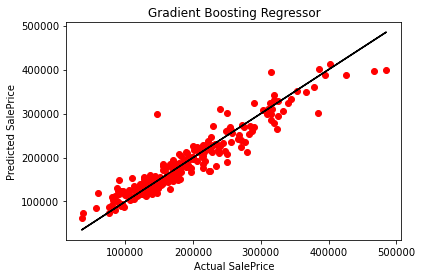

In [118]:
plt.scatter(y_test,y_pred,color='r')
plt.plot(y_test,y_test,color='k')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Gradient Boosting Regressor')
plt.show()

In [119]:
sp=pd.DataFrame({'Actual SalePrice':y_test,'Predicted SalePrice':y_pred})
sp

,Actual SalePrice,Predicted SalePrice
797,160000.0,150554.182863
971,133000.0,134477.803821
337,130500.0,128564.273974
359,180500.0,150950.053629
1004,128000.0,129226.820706
...,...,...
598,112000.0,126910.116082
1113,132000.0,129302.032772
585,98000.0,86951.275242
536,255000.0,270330.392376


### 2. Ridge Regressor

In [120]:
rr=Ridge()
rr.fit(x_train,y_train)
y_pred=rr.predict(x_test)
mod_acc=r2_score(y_test,y_pred)
print('r2_score:',mod_acc*100)
cv_score=cross_val_score(rr,x,y,cv=best_cv).mean()
print('cross_val_score:',cv_score*100)
print('Difference b\w r2_score & cross_val_score is:',(mod_acc*100)-(cv_score*100))
print('Training score:',rr.score(x_train,y_train)*100)
print('Error:')
print('Mean absolute error:',mean_absolute_error(y_test,y_pred))
print('Mean squared error:',mean_squared_error(y_test,y_pred))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score: 88.13582913975152
cross_val_score: 85.86394653614067
Difference b\w r2_score & cross_val_score is: 2.271882603610848
Training score: 86.59695797735772
Error:
Mean absolute error: 19784.35426608964
Mean squared error: 700786218.1822784
Root mean squared error: 26472.367067987674


In [121]:
parameters3={
    'alpha':[1.0,2.0],
    'fit_intercept':[True,False],
    'copy_X':[True,False],
    'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']
}

In [122]:
gscv3=GridSearchCV(rr,parameters3,scoring='r2',cv=best_cv)
gscv3.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=Ridge(),
             param_grid={'alpha': [1.0, 2.0], 'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga']},
             scoring='r2')

In [123]:
gscv3.best_params_

{'alpha': 2.0, 'copy_X': True, 'fit_intercept': True, 'solver': 'lsqr'}

In [124]:
rr=Ridge(alpha=2.0,fit_intercept=True,copy_X=True,solver='lsqr')
rr.fit(x_train,y_train)
y_pred=rr.predict(x_test)
mod_acc=r2_score(y_test,y_pred)
print('r2_score:',mod_acc*100)
cv_score=cross_val_score(rr,x,y,cv=best_cv).mean()
print('cross_val_score:',cv_score*100)
print('Difference b\w r2_score & cross_val_score is:',(mod_acc*100)-(cv_score*100))
print('Training score:',rr.score(x_train,y_train)*100)
print('Error:')
print('Mean absolute error:',mean_absolute_error(y_test,y_pred))
print('Mean squared error:',mean_squared_error(y_test,y_pred))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score: 88.13568409605159
cross_val_score: 85.87112628949642
Difference b\w r2_score & cross_val_score is: 2.2645578065551746
Training score: 86.59496061851833
Error:
Mean absolute error: 19791.21034542166
Mean squared error: 700794785.542538
Root mean squared error: 26472.528884534964


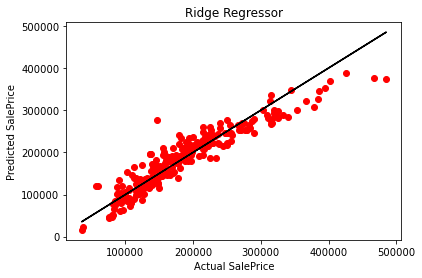

In [125]:
plt.scatter(y_test,y_pred,color='r')
plt.plot(y_test,y_test,color='k')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Ridge Regressor')
plt.show()

In [126]:
sp=pd.DataFrame({'Actual SalePrice':y_test,'Predicted SalePrice':y_pred})
sp

,Actual SalePrice,Predicted SalePrice
797,160000.0,180744.964393
971,133000.0,128989.495165
337,130500.0,134857.349086
359,180500.0,162455.747081
1004,128000.0,116441.236452
...,...,...
598,112000.0,165071.954257
1113,132000.0,126053.176034
585,98000.0,87434.815025
536,255000.0,264645.727957


### From above it is evident that Gradient Boosting Regressor model is performing better. Therefore let's save that model for future use.

In [127]:
import joblib

joblib.dump(gbr,'House_Price_predicting_model.obj')

['House_Price_predicting_model.obj']

## Let's consider Test dataset

In [128]:
df = pd.read_csv('housing_test.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [129]:
df.shape

(292, 80)

In [130]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

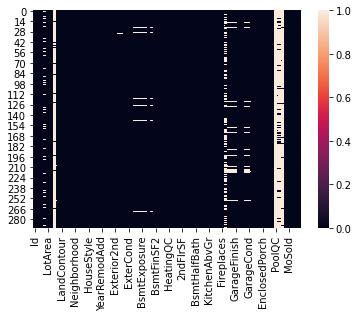

In [131]:
sns.heatmap(df.isnull())
plt.show()

    Dataset has Null Values

In [132]:
# separating features into continuous features and discrete features
con_fea = []
dis_fea = []

for i in df.columns:
    # continuous features
    if df[i].dtype != "O":
        con_fea.append(i)
    # discrete features
    else:
        dis_fea.append(i)

In [133]:
# continuous features
cf = pd.DataFrame({})
for i in con_fea:
    cf[i]=df[i]

# discrete features
dif = pd.DataFrame({})
for i in dis_fea:
    dif[i]=df[i]

In [134]:
# continuous features
cf.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold
0,337,20,86.0,14157,9,5,2005,2006,200.0,1249,...,178,51,0,0,0,0,NaN,0,7,2007
1,1018,120,NaN,5814,8,5,1984,1984,0.0,1036,...,63,0,0,0,0,0,NaN,0,8,2009
2,929,20,NaN,11838,8,5,2001,2001,0.0,0,...,202,151,0,0,0,0,NaN,0,6,2009
3,1148,70,75.0,12000,7,7,1941,1950,0.0,275,...,0,0,0,0,0,0,NaN,0,7,2009
4,1227,60,86.0,14598,6,5,2007,2007,74.0,0,...,100,18,0,0,0,0,NaN,0,1,2008


In [135]:
# discrete features
dif.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,...,Gd,Attchd,Fin,TA,TA,Y,NaN,NaN,WD,Normal
1,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,...,Ex,Attchd,RFn,TA,TA,Y,NaN,NaN,COD,Abnorml
2,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,WD,Normal
3,RL,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,...,Gd,Attchd,Unf,TA,TA,Y,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,...,Gd,BuiltIn,Fin,TA,TA,Y,NaN,NaN,WD,Normal


# Handling the NaN values

## 1. Method: KNNImputer

In [136]:
cf['PoolQC'].isnull().sum()

292

In [137]:
# All values in PoolQC column are Null, hence let's drop this.
cf.drop('PoolQC',axis=1,inplace=True)

In [138]:
from sklearn.impute import KNNImputer

# filling the NaN values present in the continuous features
imputer = KNNImputer(n_neighbors=5)
cf = pd.DataFrame(imputer.fit_transform(cf),columns = cf.columns)

## 2. Method: SimpleImputer

In [139]:
from sklearn.impute import SimpleImputer

# filling the NaN values present in the discrete features
imputer2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
dif = pd.DataFrame(imputer2.fit_transform(dif),columns = dif.columns)

In [140]:
# converting categorical values into discrete values
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
for i in dif.columns:
    dif[i]=le.fit_transform(dif[i])

In [141]:
df = pd.concat([cf,dif],axis=1)
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,MiscFeature,SaleType,SaleCondition
0,337.0,20.0,86.0,14157.0,9.0,5.0,2005.0,2006.0,200.0,1249.0,...,2,1,0,4,4,2,2,1,5,2
1,1018.0,120.0,50.2,5814.0,8.0,5.0,1984.0,1984.0,0.0,1036.0,...,0,1,1,4,4,2,2,1,0,0
2,929.0,20.0,79.2,11838.0,8.0,5.0,2001.0,2001.0,0.0,0.0,...,4,1,1,4,4,2,2,1,5,2
3,1148.0,70.0,75.0,12000.0,7.0,7.0,1941.0,1950.0,0.0,275.0,...,2,1,2,4,4,2,2,1,5,2
4,1227.0,60.0,86.0,14598.0,6.0,5.0,2007.0,2007.0,74.0,0.0,...,2,3,0,4,4,2,2,1,5,2


In [142]:
df.isnull().sum().any()

False

# Data Cleaning

In [143]:
# training dataset
train.shape

(1120, 51)

In [144]:
X = train.drop('SalePrice',axis=1)

In [145]:
X.shape

(1120, 50)

In [146]:
df.shape

(292, 79)

In [147]:
# retaining only those features which we have used to train the model
cols = []
for i in df.columns:
    if i in X.columns:
        cols.append(i)        

In [148]:
X.columns == cols

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [149]:
hd = pd.DataFrame({})
for i in cols:
    hd[i]=df[i]

In [150]:
hd.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,HeatingQC,CentralAir,Electrical,KitchenQual,GarageType,GarageFinish,GarageQual,PavedDrive,SaleType,SaleCondition
0,86.0,14157.0,9.0,2005.0,2006.0,200.0,1249.0,673.0,1922.0,1922.0,...,0,1,3,2,1,0,4,2,5,2
1,50.2,5814.0,8.0,1984.0,1984.0,0.0,1036.0,184.0,1220.0,1360.0,...,2,1,3,2,1,1,4,2,0,0
2,79.2,11838.0,8.0,2001.0,2001.0,0.0,0.0,1753.0,1753.0,1788.0,...,0,1,3,0,1,1,4,2,5,2
3,75.0,12000.0,7.0,1941.0,1950.0,0.0,275.0,429.0,704.0,860.0,...,0,1,3,1,1,2,4,2,5,2
4,86.0,14598.0,6.0,2007.0,2007.0,74.0,0.0,894.0,894.0,894.0,...,0,1,3,2,3,0,4,2,5,2


## Checking Outliers

    Let's check randomly, whether some features have outliers or not

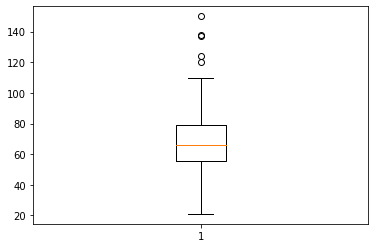

In [151]:
plt.boxplot(hd['LotFrontage'])
plt.show()

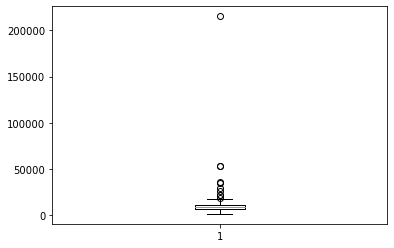

In [152]:
plt.boxplot(hd['LotArea'])
plt.show()

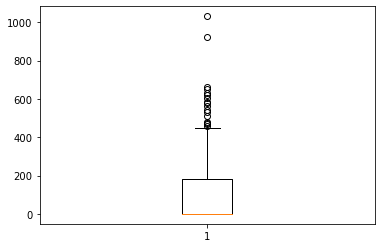

In [153]:
plt.boxplot(hd['MasVnrArea'])
plt.show()

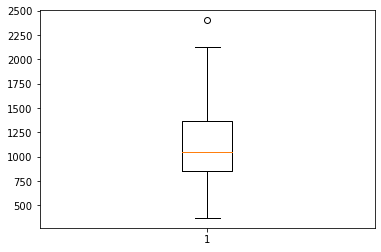

In [154]:
plt.boxplot(hd['1stFlrSF'])
plt.show()

### Observations:
    From above boxplots, it is clear that outliers exists.

## Removing Outliers

### 1. Z-score Method

In [155]:
z=np.abs(zscore(hd))

In [156]:
# Threshold=6
np.where(z>6)

(array([  1,  10,  71, 107, 198, 227, 254, 273], dtype=int64),
 array([48, 26, 48, 48, 46, 48, 48,  1], dtype=int64))

In [157]:
# Threshold=6
test = hd[(z<6).all(axis=1)]

In [158]:
print(hd.shape,'\t',test.shape)

(292, 50) 	 (284, 50)


In [159]:
# percentage loss of data
per_loss=((292-284)/292)*100
per_loss

2.73972602739726

### Observations:    
    Since significance amount of data is not lost after removing outliers we can go ahead.

## Checking Skewness

In [160]:
test.skew()

LotFrontage      0.109039
LotArea          3.722580
OverallQual      0.399160
YearBuilt       -0.786645
YearRemodAdd    -0.595873
MasVnrArea       1.980068
BsmtFinSF1       0.741467
BsmtUnfSF        0.945375
TotalBsmtSF      0.491846
1stFlrSF         0.707374
2ndFlrSF         0.741930
GrLivArea        1.028824
FullBath        -0.066547
HalfBath         0.731606
TotRmsAbvGrd     0.820408
Fireplaces       0.522253
GarageYrBlt     -0.611207
GarageCars      -0.291125
GarageArea       0.122215
WoodDeckSF       1.669788
OpenPorchSF      2.170726
MSZoning         0.494859
LotShape        -0.647006
LandContour     -3.305081
LotConfig       -1.224232
Neighborhood     0.043967
Condition2       0.000000
BldgType         2.049269
HouseStyle       0.369920
RoofStyle        1.393336
Exterior1st     -0.671482
Exterior2nd     -0.707386
MasVnrType       0.037094
ExterQual       -1.896138
Foundation       0.352518
BsmtQual        -1.325757
BsmtCond        -4.794801
BsmtExposure    -1.288179
BsmtFinType1

### Observations:    
    Acceptable range of skewness is +\- 0.6, hence data is skewed.

## Standardizing Data

In [161]:
sc=StandardScaler()
test=sc.fit_transform(test)

# Loading Model

In [162]:
gbr = joblib.load('House_Price_predicting_model.obj')

## Predicting House Price

In [163]:
house_price = gbr.predict(test)

In [164]:
hp = pd.DataFrame({'House Price':house_price})
hp

,House Price
0,354191.702794
1,274695.867724
2,157146.522575
3,223596.902789
4,84754.776264
...,...
279,231580.378746
280,146386.677280
281,139158.832106
282,152592.933710


In [165]:
# saving the predicted House Price in a csv file.
hp.to_csv('House_Price.csv')